# Use XGBoost for modelling

This modelling notebook was generated only be me, Dominik. I use the kickstarter_modelling.csv file generated in the EDA notebook for modelling. We decided to try out XGBoost, because it is known to be a good algorithm for classification problems.

In [1]:
# import all necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, roc_auc_score, f1_score
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


RSEED = 45

In [2]:
# import the modeling csv file
df_kickstarter = pd.read_csv('../data/kickstarter_modeling.csv')
df_kickstarter.head()

,funding_goal,outcome,funding_period,launch_year,category_Comics,category_Crafts,category_Dance,category_Design,category_Fashion,category_Film & Video,...,country_Mexico,country_Netherlands,country_New Zealand,country_Norway,country_Singapore,country_Spain,country_Sweden,country_Switzerland,country_United Kingdom,country_United States
0,1000,0,39,2009,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,80000,0,87,2009,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,20,1,8,2009,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,99,1,79,2009,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1900,0,28,2009,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
# define the target and features
X = df_kickstarter.drop('outcome', axis=1)
y = df_kickstarter['outcome']
X.shape, y.shape

((331462, 196), (331462,))

In [4]:
# do the train/test split. The training set is used for the model training, the test set is used for evaluation
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=RSEED)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((248596, 196), (82866, 196), (248596,), (82866,))

In [5]:
# train a first, simple XGBoost model
boost = XGBClassifier()
boost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [6]:
# make predictions on training data as well as on the test data
y_pred_train = boost.predict(X_train)
y_pred = boost.predict(X_test)

<Axes: xlabel='Predicted', ylabel='Actual'>

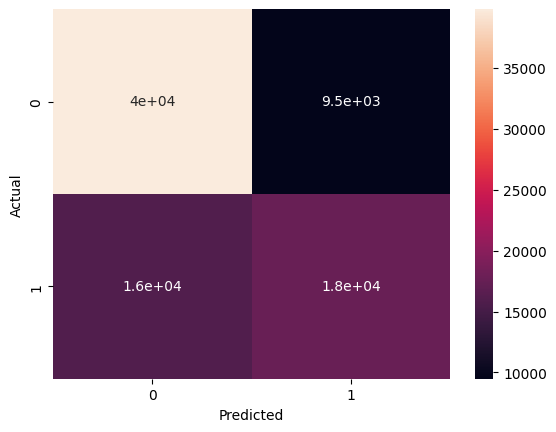

In [7]:
# Confusion matrix using pandas crosstab
conf_matrix= pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True)

## Interpretation

This model is already not too terrible. There are a lot of true negatives and very little false positives, which is something that was important for us. The problem is with the true positives and the false positives.

In [8]:
# function to display the evaluation metricees
def get_scores(y_pred_train, y_pred, y_train=y_train, y_test=y_test):
    '''
    Getting all the scores to rate the model

    y_pred_train = predicted y of the training data
    
    y_pred = predicted y of the test data
    '''
    acc_train = accuracy_score(y_pred_train, y_train)
    acc = accuracy_score(y_pred, y_test)
    print(f'Train accuracy is : {acc_train}')
    print(f'Test accuracy is : {acc}')

    print('---' * 17)

    prec_train = precision_score(y_pred_train, y_train)
    prec = precision_score(y_pred, y_test)
    print(f'Train precision is : {prec_train}')
    print(f'Test precision is : {prec}')

    print('---' * 17)

    reca_train = recall_score(y_pred_train, y_train)
    reca = recall_score(y_pred, y_test)
    print(f'Train recall is : {reca_train}')
    print(f'Test recall is : {reca}')

    print('---' * 17)

    f1_train = f1_score(y_pred_train, y_train)
    f1 = f1_score(y_pred, y_test)
    print(f'Train f1 score is : {f1_train}')
    print(f'Test f1 score is : {f1}')

    print('---' * 17)

    roc_train = roc_auc_score(y_pred_train, y_train)
    roc = roc_auc_score(y_pred, y_test)
    print(f'Train roc_auc is : {roc_train}')
    print(f'Test roc_auc is : {roc}')

In [9]:
get_scores(y_pred_train, y_pred)

Train accuracy is : 0.701829474327825
Test accuracy is : 0.6926966427726692
---------------------------------------------------
Train precision is : 0.5381754735792622
Test precision is : 0.5238293940568091
---------------------------------------------------
Train recall is : 0.660035215573109
Test recall is : 0.6493866390777416
---------------------------------------------------
Train f1 score is : 0.5929086894915477
Test f1 score is : 0.5798894663037202
---------------------------------------------------
Train roc_auc is : 0.6911773425809962
Test roc_auc is : 0.6815443284632822


## Interpretation

The accuracy seems already kind of fine, but that is because we don't have a balanced dataset. The good classification of negatives gives a good accuracy, even though the true positives are bad.

## Scaling the data

The first thing to do in order to improve the modelling is to scale the numerical data.

In [10]:
X_train.head()

,funding_goal,funding_period,launch_year,category_Comics,category_Crafts,category_Dance,category_Design,category_Fashion,category_Film & Video,category_Food,...,country_Mexico,country_Netherlands,country_New Zealand,country_Norway,country_Singapore,country_Spain,country_Sweden,country_Switzerland,country_United Kingdom,country_United States
97463,2000,29,2013,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
141730,38000,37,2014,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
183714,47348,24,2015,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
208796,5000,59,2015,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
274154,2500,29,2016,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
# scaling the train data with standard scaler, I scaling the categories: funding_goal, funding_period and launch_year
col_scale = ['funding_goal', 'funding_period', 'launch_year']
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[col_scale])
X_train_preprocessed = np.concatenate([X_train_scaled, X_train.drop(col_scale, axis=1)], axis=1)
X_train_preprocessed = pd.DataFrame(X_train_preprocessed)
X_train_preprocessed.columns = X_train.columns
X_train_preprocessed.head()

,funding_goal,funding_period,launch_year,category_Comics,category_Crafts,category_Dance,category_Design,category_Fashion,category_Film & Video,category_Food,...,country_Mexico,country_Netherlands,country_New Zealand,country_Norway,country_Singapore,country_Spain,country_Sweden,country_Switzerland,country_United Kingdom,country_United States
0,0.000012,0.318681,0.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.000228,0.406593,0.625,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.000285,0.263736,0.750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000030,0.648352,0.750,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.000015,0.318681,0.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [12]:
X_test.head()

,funding_goal,funding_period,launch_year,category_Comics,category_Crafts,category_Dance,category_Design,category_Fashion,category_Film & Video,category_Food,...,country_Mexico,country_Netherlands,country_New Zealand,country_Norway,country_Singapore,country_Spain,country_Sweden,country_Switzerland,country_United Kingdom,country_United States
259864,4000,29,2016,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
75338,2000,29,2013,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
179807,195909,29,2015,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
327632,1214,29,2017,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
192323,1000,29,2015,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
# scaling the test data the same way
X_test_scaled = scaler.fit_transform(X_test[col_scale])
X_test_preprocessed = np.concatenate([X_test_scaled, X_test.drop(col_scale, axis=1)], axis=1)
X_test_preprocessed = pd.DataFrame(X_test_preprocessed)
X_test_preprocessed.columns = X_test.columns
X_test_preprocessed.head()

,funding_goal,funding_period,launch_year,category_Comics,category_Crafts,category_Dance,category_Design,category_Fashion,category_Film & Video,category_Food,...,country_Mexico,country_Netherlands,country_New Zealand,country_Norway,country_Singapore,country_Spain,country_Sweden,country_Switzerland,country_United Kingdom,country_United States
0,0.000037,0.318681,0.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.000019,0.318681,0.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.001825,0.318681,0.750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000011,0.318681,1.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.000009,0.318681,0.750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [14]:
# train the XGBoost model with the scaled X data
boost2 = XGBClassifier()
boost2.fit(X_train_preprocessed, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [15]:
# predictions
y_pred_train_pros = boost2.predict(X_train_preprocessed)
y_pred_pros = boost2.predict(X_test_preprocessed)

<Axes: xlabel='Predicted', ylabel='Actual'>

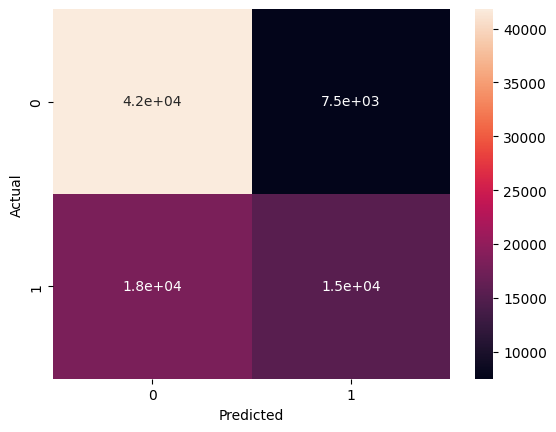

In [16]:
# Confusion matrix using pandas crosstab
conf_matrix= pd.crosstab(y_test, y_pred_pros, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True)

## Interpretation

Looking at the false negatives and the true positives, the model actually got a bit worse

In [17]:
get_scores(y_pred_train_pros, y_pred_pros)

Train accuracy is : 0.701829474327825
Test accuracy is : 0.6895349117852919
---------------------------------------------------
Train precision is : 0.5381754735792622
Test precision is : 0.45706536317844476
---------------------------------------------------
Train recall is : 0.660035215573109
Test recall is : 0.6712334763197059
---------------------------------------------------
Train f1 score is : 0.5929086894915477
Test f1 score is : 0.5438232530099119
---------------------------------------------------
Train roc_auc is : 0.6911773425809962
Test roc_auc is : 0.6838673212988066


It actually looks like the scaled data has actually worse outcome

## Starting the RandomSearches

I am now using RandomSearch to find the best conditions for the model. At first I decided to improve for precision.

In [18]:
# I will do a first round of randomized search to get better parameters

param_grid = {'max_depth': [2,4,3,6,10],
              'n_estimators': [10,20,30],
            }

# instantiate the search
rs = RandomizedSearchCV(XGBClassifier(), param_grid, scoring='precision',
                        cv = 5, verbose=5, n_jobs=-1, n_iter=10, random_state=RSEED)

rs.fit(X_train_preprocessed, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 4/5] END ......max_depth=6, n_estimators=10;, score=0.647 total time= 1.3min
[CV 2/5] END ......max_depth=6, n_estimators=10;, score=0.652 total time= 1.3min
[CV 3/5] END ......max_depth=6, n_estimators=10;, score=0.645 total time= 1.3min
[CV 5/5] END ......max_depth=6, n_estimators=10;, score=0.643 total time= 1.3min
[CV 1/5] END ......max_depth=6, n_estimators=10;, score=0.645 total time= 1.3min
[CV 3/5] END ......max_depth=3, n_estimators=10;, score=0.660 total time=  41.6s
[CV 1/5] END ......max_depth=3, n_estimators=10;, score=0.631 total time=  42.0s
[CV 2/5] END ......max_depth=3, n_estimators=10;, score=0.653 total time=  42.1s
[CV 3/5] END ......max_depth=3, n_estimators=30;, score=0.653 total time= 2.1min
[CV 2/5] END ......max_depth=3, n_estimators=30;, score=0.651 total time= 2.1min
[CV 1/5] END ......max_depth=3, n_estimators=30;, score=0.644 total time= 2.1min
[CV 5/5] END ......max_depth=3, n_estimators=10;

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 4, 3, 6, 10],
                                        'n_estimators': [10, 20, 30]},
                   random_state=45, scoring='precision', verbose=5)

In [19]:
# getting the best score
print('Best score:', round(rs.best_score_, 3))

# getting the best parameters
print('Best parameters: ', rs.best_params_)

Best score: 0.652
Best parameters:  {'n_estimators': 20, 'max_depth': 2}


In [20]:
# assingning the best fitted parameters
xgb_best = rs.best_estimator_

y_pred_test_rs = xgb_best.predict(X_test_preprocessed)

print('Extreme Gradient Boosting (XGBClassifier)')
print('=======================')
print('max_depth: {}'.format(xgb_best.max_depth))
print('n_estimators: {}'.format(xgb_best.n_estimators))

rxgb_precision = precision_score(y_test, y_pred_test_rs)
print('Test precision: {:2f}'.format(rxgb_precision))

Extreme Gradient Boosting (XGBClassifier)
max_depth: 2
n_estimators: 20
Test precision: 0.681514


<Axes: xlabel='Predicted', ylabel='Actual'>

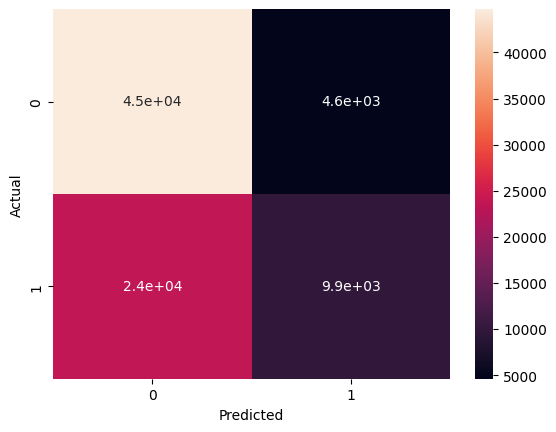

In [21]:
# Confusion matrix using pandas crosstab
conf_matrix= pd.crosstab(y_test, y_pred_test_rs, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True)

## Interpretation

This model is again worse, because the false negatives got more and the true positives less.

## Ideas for more hyperparameters to tweak
- lambda, makes the model more conservative (L2 regularisation to decrease overfitting, use 0,1,3,5, default: 1)
- tree_method, tree construction algorithm (use auto, exact, approx, hist, default: auto)
- subsample, randomly subsample training data prior to growing trees (use 0, 0.5, 1, default: 1)
- booster, decide which booster to use (use gbtree, gblinear, dart, default: gbtree)


In [22]:
# Second round of randomized search to get better parameters

param_grid = {'max_depth': [1,2],
              'n_estimators': [20],
              'tree_method': ['auto', 'exact', 'approx', 'hist'],
              'subsample': [0.3,0.5,0.7,1],
              'booster': ['gbtree', 'gblinear', 'dart']
            }

# instantiate the search
rs2 = RandomizedSearchCV(XGBClassifier(), param_grid, scoring='precision',
                        cv = 5, verbose=5, n_jobs=-1, n_iter=10, random_state=RSEED)

rs2.fit(X_train_preprocessed, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 5/5] END booster=gbtree, max_depth=1, n_estimators=20, subsample=0.3, tree_method=auto;, score=0.627 total time=  42.0s
[CV 3/5] END booster=gbtree, max_depth=1, n_estimators=20, subsample=0.3, tree_method=exact;, score=0.641 total time=  42.4s
[CV 2/5] END booster=gbtree, max_depth=1, n_estimators=20, subsample=0.3, tree_method=exact;, score=0.642 total time=  42.4s
[CV 1/5] END booster=gbtree, max_depth=1, n_estimators=20, subsample=0.3, tree_method=auto;, score=0.650 total time=  42.5s
[CV 3/5] END booster=gbtree, max_depth=1, n_estimators=20, subsample=0.3, tree_method=auto;, score=0.641 total time=  42.6s
[CV 1/5] END booster=gbtree, max_depth=1, n_estimators=20, subsample=0.3, tree_method=exact;, score=0.650 total time=  42.6s
[CV 4/5] END booster=gbtree, max_depth=1, n_estimators=20, subsample=0.3, tree_method=auto;, score=0.653 total time=  42.7s
[CV 2/5] END booster=gbtree, max_depth=1, n_estimators=20, subsample

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'booster': ['gbtree', 'gblinear',
                                                    'dart'],
                                        'max_depth': [1, 2],
                                        'n_estimators': [20],
                                        'subsample': [0.3, 0.5, 0.7, 1],
                                        'tree_method': ['auto', 'exact',
                                                        'approx', 'hist']},
                   random_state=45, scoring='precision', verbose=5)

In [23]:
# getting the best score
print('Best score:', round(rs2.best_score_, 3))

# getting the best parameters
print('Best parameters: ', rs2.best_params_)

Best score: 0.654
Best parameters:  {'tree_method': 'approx', 'subsample': 0.3, 'n_estimators': 20, 'max_depth': 2, 'booster': 'dart'}


In [24]:
# assingning the best fitted parameters
xgb_best2 = rs2.best_estimator_

y_pred_test_rs2 = xgb_best2.predict(X_test_preprocessed)

print('Extreme Gradient Boosting (XGBClassifier)')
print('=======================')
print('max_depth: {}'.format(xgb_best2.max_depth))
print('n_estimators: {}'.format(xgb_best2.n_estimators))
print('tree_method: {}'.format(xgb_best2.tree_method))
print('subsample: {}'.format(xgb_best2.subsample))
print('booster: {}'.format(xgb_best2.booster))

rxgb_precision2 = precision_score(y_test, y_pred_test_rs2)
print('Test precision: {:2f}'.format(rxgb_precision2))

Extreme Gradient Boosting (XGBClassifier)
max_depth: 2
n_estimators: 20
tree_method: approx
subsample: 0.3
booster: dart
Test precision: 0.673304


<Axes: xlabel='Predicted', ylabel='Actual'>

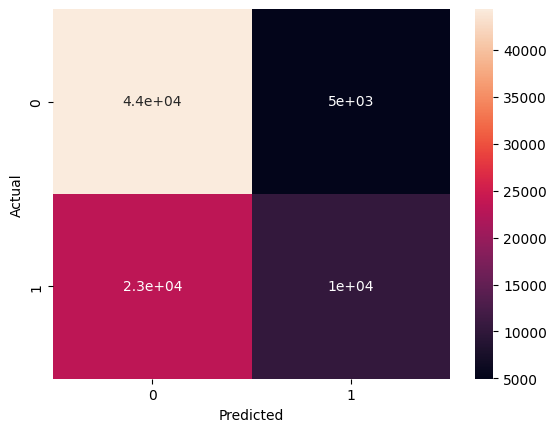

In [25]:
# Confusion matrix using pandas crosstab
conf_matrix= pd.crosstab(y_test, y_pred_test_rs2, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True)

## Interpretation

Still no improvement

In [26]:
# Third round of randomized search to get better parameters, since I have a looot of false negatives, I will try to see what a random search on f1 score will do

param_grid = {'max_depth': [1,2,3,4,6,10],
              'n_estimators': [10,20,30],
              'tree_method': ['auto', 'exact', 'approx', 'hist'],
              'subsample': [0.3,0.5,0.7,1],
              'booster': ['gbtree', 'gblinear', 'dart']
            }

# instantiate the search
rs3 = RandomizedSearchCV(XGBClassifier(), param_grid, scoring='f1',
                        cv = 5, verbose=5, n_jobs=-1, n_iter=10, random_state=RSEED)

rs3.fit(X_train_preprocessed, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[23:18:54] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_depth", "subsample", "tree_method" } are not used.

[23:18:54] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_depth", "subsample", "tree_method" } are not used.

[CV 5/5] END booster=gblinear, max_depth=10, n_estimators=20, subsample=0.5, tree_method=hist;, score=nan total time=   8.8s
[23:18:54] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_depth", "subsample", "tree_method" } are not used.

[CV 2/5] END booster=gblinear, max_depth=10, n_estimators=20, subsample=0.5, tree_method=hist;, score=nan total time=   8.8s
[23:18:54] WARNING: /Users/runner/work/xgboost/xgboost/pyth

/Users/mimmo/Desktop/neuefische/ML_project/.venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/mimmo/Desktop/neuefische/ML_project/.venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mimmo/Desktop/neuefische/ML_project/.venv/lib/python3.11/site-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/Users/mimmo/Desktop/neuefische/ML_project/.venv/lib/pyth

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'booster': ['gbtree', 'gblinear',
                                                    'dart'],
                                        'max_depth': [1, 2, 3, 4, 6, 10],
                                        'n_estimators': [10, 20, 30],
                                        'subsample': [0.3, 0.5, 0.7, 1],
                                        'tree_method': ['auto', 'exact',
                                                        'approx', 'hist']},
                   random_state=45, scoring='f1', verbose=5)

In [27]:
# getting the best score
print('Best score:', round(rs3.best_score_, 3))

# getting the best parameters
print('Best parameters: ', rs3.best_params_)

Best score: 0.575
Best parameters:  {'tree_method': 'auto', 'subsample': 0.3, 'n_estimators': 30, 'max_depth': 10, 'booster': 'gbtree'}


In [28]:
# assingning the best fitted parameters
xgb_best3 = rs3.best_estimator_

y_pred_rs3 = xgb_best3.predict(X_train_preprocessed)
y_pred_test_rs3 = xgb_best3.predict(X_test_preprocessed)

print('Extreme Gradient Boosting (XGBClassifier)')
print('=======================')
print('max_depth: {}'.format(xgb_best3.max_depth))
print('n_estimators: {}'.format(xgb_best3.n_estimators))
print('tree_method: {}'.format(xgb_best3.tree_method))
print('subsample: {}'.format(xgb_best3.subsample))
print('booster: {}'.format(xgb_best3.booster))

rxgb_precision3_train = precision_score(y_train, y_pred_rs3)
print('Train precision: {:2f}'.format(rxgb_precision3_train))
rxgb_precision3 = precision_score(y_test, y_pred_test_rs3)
print('Test precision: {:2f}'.format(rxgb_precision3))
rxgb_f1score3 = f1_score(y_test, y_pred_test_rs3)
print('Test f1 score: {:2f}'.format(rxgb_f1score3))

Extreme Gradient Boosting (XGBClassifier)
max_depth: 10
n_estimators: 30
tree_method: auto
subsample: 0.3
booster: gbtree
Train precision: 0.658584
Test precision: 0.657538
Test f1 score: 0.537443


<Axes: xlabel='Predicted Labels', ylabel='True Labels'>

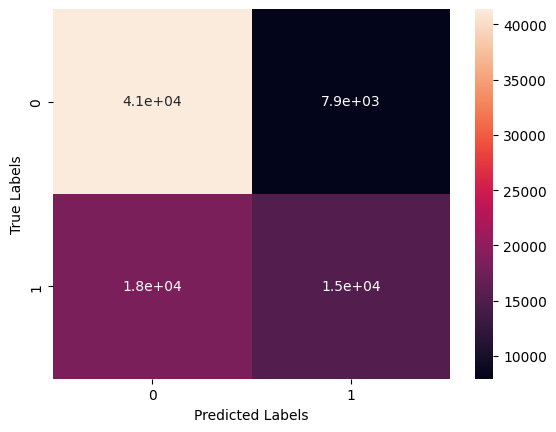

In [29]:
# Confusion matrix using pandas crosstab
conf_matrix= pd.crosstab(y_test, y_pred_test_rs3, rownames=['True Labels'], colnames=['Predicted Labels'])
sns.heatmap(conf_matrix, annot=True)

## Interpretation
This is actually the best model we had so far.

## Export the best model

In [30]:
import pickle
import joblib
filename = 'kickstarter_model.pkl'
joblib.dump(xgb_best3, filename)

['kickstarter_model.pkl']

## Export the preprocessing steps

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

categorical_features = ['category', 'subcategory', 'country']
scaled_features = ['funding_goal', 'funding_period', 'launch_year']

In [41]:
categorical_transformer = Pipeline(steps=[
    'onehot', OneHotEncoder(handle_unknown='ignore')
])

numerical_transformer = Pipeline(steps=[
    'scaler', MinMaxScaler()
])

In [42]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, scaled_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [43]:
filename = 'kickstarter_preprocessing.pkl'
joblib.dump(preprocessor, filename)

['kickstarter_preprocessing.pkl']

## Error analysis
This is our best model so far, so we will now do an error analysis for it.

I am starting with the feature importance and then residual analysis

<Axes: title={'center': 'Most important features'}, xlabel='feature importance'>

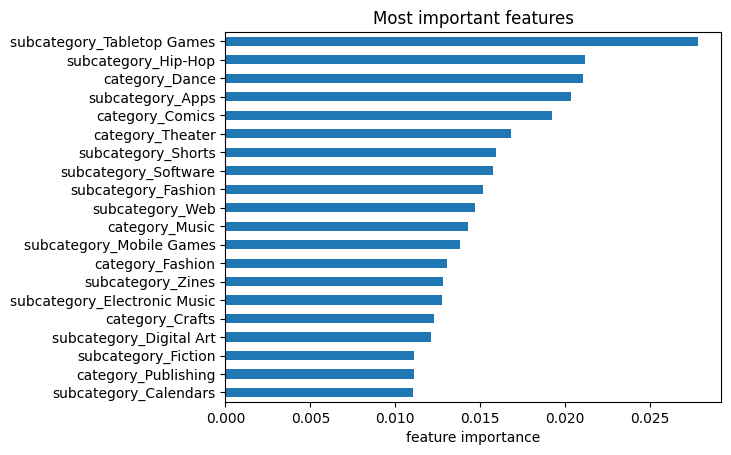

In [31]:
# getting the top twenty feature importance
feat_importances = pd.Series(xgb_best3.feature_importances_, index=X.columns)
feat_importances.nlargest(20)[::-1].plot(kind='barh', xlabel='feature importance', title='Most important features')

## Interpretation

This important feature analysis fits to what we found out earlier in the EDA. (Sub)categories like Tabletop games, Dance or Theater had very high success rates, while Apps or Web were especially unsuccessful. Both of which should make them very important for the modelling.

Since all of the most important features are one-hot-encoded features, we wanted to see how the importance would look for all the original features. Thus, I will now add up all the importance values of the different one-hot-encoded features that belonged to one original feature.

In [32]:
feat_importances

funding_goal              0.004159
funding_period            0.003641
launch_year               0.002825
category_Comics           0.019244
category_Crafts           0.012264
                            ...   
country_Spain             0.003480
country_Sweden            0.001598
country_Switzerland       0.002011
country_United Kingdom    0.002099
country_United States     0.002563
Length: 196, dtype: float32

In [33]:
df_kickstarter.columns

Index(['funding_goal', 'outcome', 'funding_period', 'launch_year',
       'category_Comics', 'category_Crafts', 'category_Dance',
       'category_Design', 'category_Fashion', 'category_Film & Video',
       ...
       'country_Mexico', 'country_Netherlands ', 'country_New Zealand',
       'country_Norway', 'country_Singapore', 'country_Spain',
       'country_Sweden', 'country_Switzerland', 'country_United Kingdom',
       'country_United States'],
      dtype='object', length=197)

In [34]:
# sum up the feature importances
category_importances = feat_importances[feat_importances.index.str.startswith('category_')]
subcategory_importances = feat_importances[feat_importances.index.str.startswith('subcategory_')]
country_importances = feat_importances[feat_importances.index.str.startswith('country_')]
goal_importance = feat_importances[feat_importances.index.str.startswith('funding_goal')]
period_importance = feat_importances[feat_importances.index.str.startswith('funding_period')]
year_importance = feat_importances[feat_importances.index.str.startswith('launch_year')]

category_importance_sum = category_importances.sum()
subcategory_importance_sum = subcategory_importances.sum()
country_importance_sum = country_importances.sum()
goal_importance_sum = goal_importance.sum()
period_importance_sum = period_importance.sum()
year_importance_sum = year_importance.sum()

# Create a new DataFrame with the summed feature importance values
sum_importance_df = pd.DataFrame({
    'Feature': ['Category', 'Subcategory', 'Country', 'funding_goal', 'funding_period', 'launch_year'],
    'Importance': [category_importance_sum, subcategory_importance_sum, country_importance_sum,
                    goal_importance_sum, period_importance_sum, year_importance_sum]
})

sum_importance_df

,Feature,Importance
0,Category,0.149335
1,Subcategory,0.775360
2,Country,0.064679
3,funding_goal,0.004159
4,funding_period,0.003641
5,launch_year,0.002825


In [35]:
sum_importance_df = sum_importance_df.sort_values('Importance').reset_index()

In [36]:
fig = px.bar(sum_importance_df, x='Importance', y='Feature', title= 'Importance of the original features')
fig.update_yaxes(title_text = '', tickangle = 0, tickmode='linear')
fig.update_xaxes(title_text = 'Accumulated feature importance')
fig.update_layout(title_x = 0.5, width = 800)
fig.show()

## Interpretation

The most important original feature is by far the subcategory. Other relevant featues are the category as well as the country of origin. The funding goal, period or year were rather unimportant, which logically also makes sense.

## Final Interpretation

The results of the feature importance analysis of the best model are in line with our findings during the EDA.

Yet, even the best model does not perform very well. With the domain knowledge that I have about Kickstarter projects, I can explain this as following: We were not given the features that really decide on the success of a Kickstarter campain. Surely, the (sub)category and the country of origin will contribute, but some of the most important feature would be:

- How and were is the project advertised? (For example advertisement budget, advertisement strategies, advertisement platforms)
- How well is the project outline designed and described? (A nice campaign design looks much more professional and will attract more backers)

So, with the data that we were given, I think we achieved the best that we could.